# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plot_config import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m = [1, 10, 50]

## Simulation $H=0.8$

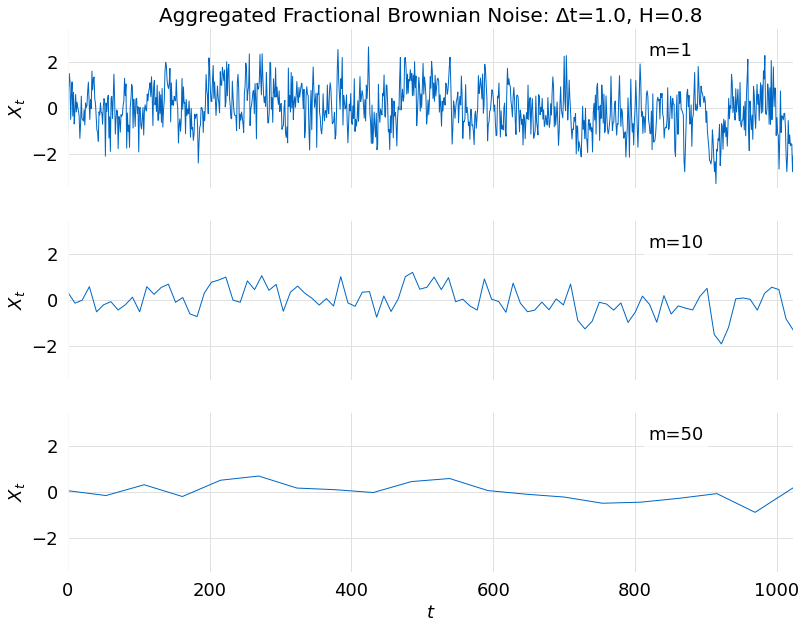

In [16]:
H = 0.8

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

In [4]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1462.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.07e-60
Time:                        09:41:08   Log-Likelihood:                 206.09
No. Observations:                 100   AIC:                            -408.2
Df Residuals:                      98   BIC:                            -403.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1364      0.016     -8.417      0.000      -0.169      -0.104
x1            -0.4040      0.011    -38.234      0.000      -0.425      -0.383
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.280
Skew:                           0.059   Prob(JB):                        0.870
Kurtosis:                       2.769   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

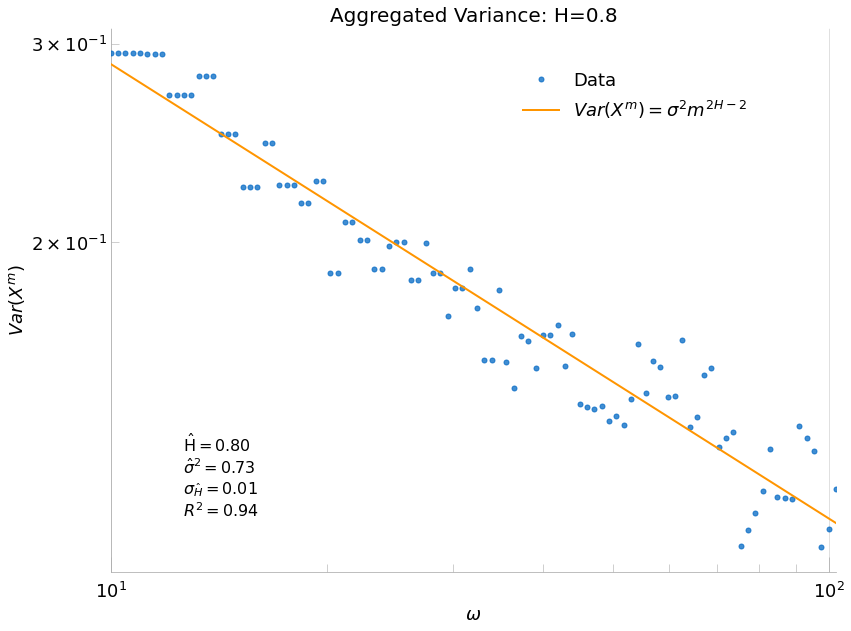

In [5]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.6$

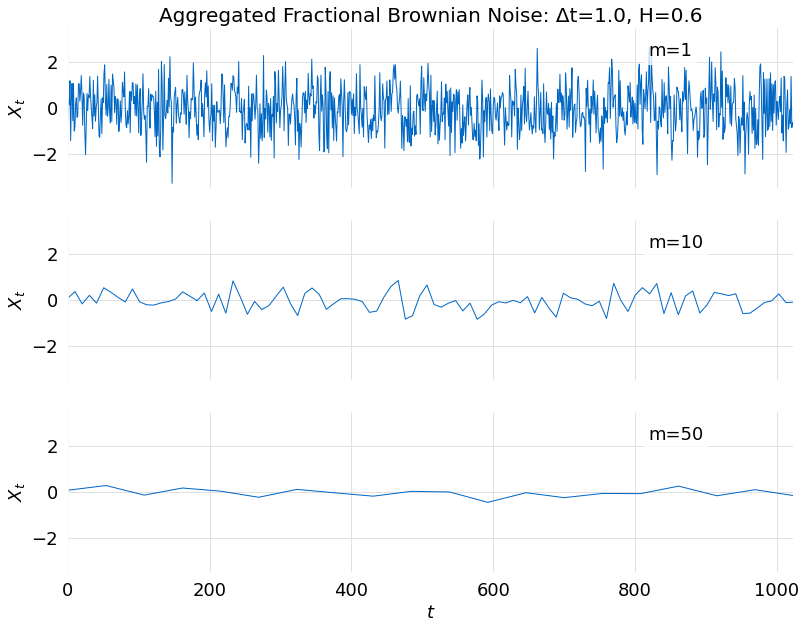

In [17]:
H = 0.6

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

In [7]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1555.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           6.12e-62
Time:                        09:41:09   Log-Likelihood:                 118.20
No. Observations:                 100   AIC:                            -232.4
Df Residuals:                      98   BIC:                            -227.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2793      0.039      7.156      0.000       0.202       0.357
x1            -1.0036      0.025    -39.440      0.000      -1.054      -0.953
==============================================================================
Omnibus:                       14.305   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               47.416
Skew:                          -0.223   Prob(JB):                     5.05e-11
Kurtosis:                       6.344   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.4$

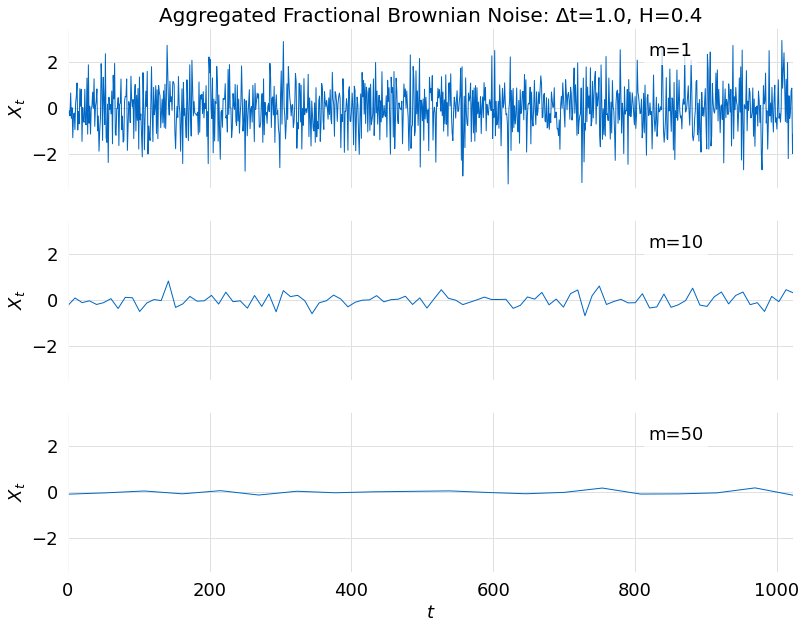

In [18]:
H = 0.4

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

In [10]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1759.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           2.05e-64
Time:                        09:41:09   Log-Likelihood:                 91.304
No. Observations:                 100   AIC:                            -178.6
Df Residuals:                      98   BIC:                            -173.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.051      4.234      0.000       0.115       0.318
x1            -1.3967      0.033    -41.944      0.000      -1.463      -1.331
==============================================================================
Omnibus:                       10.429   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.724
Skew:                          -0.557   Prob(JB):                      0.00173
Kurtosis:                       4.347   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

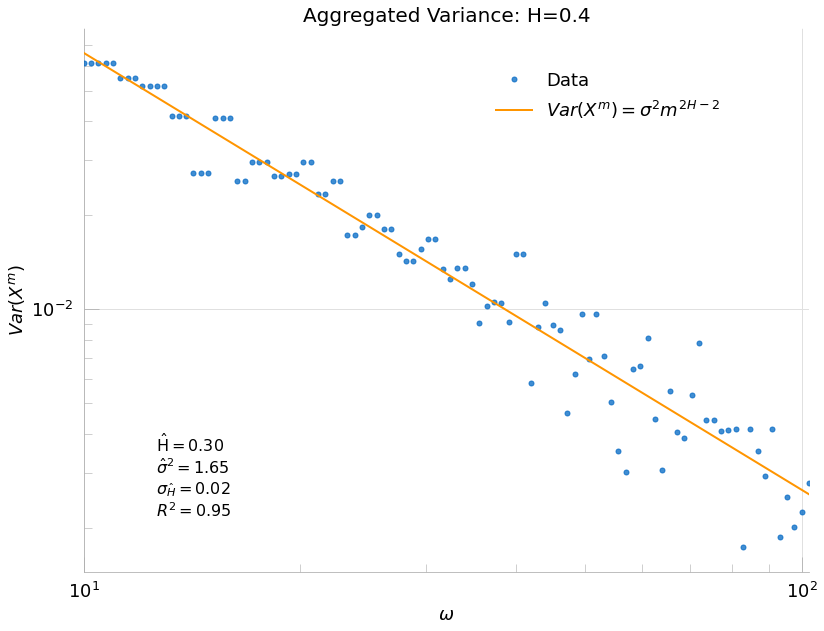

In [11]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)

## Simulation $H=0.2$

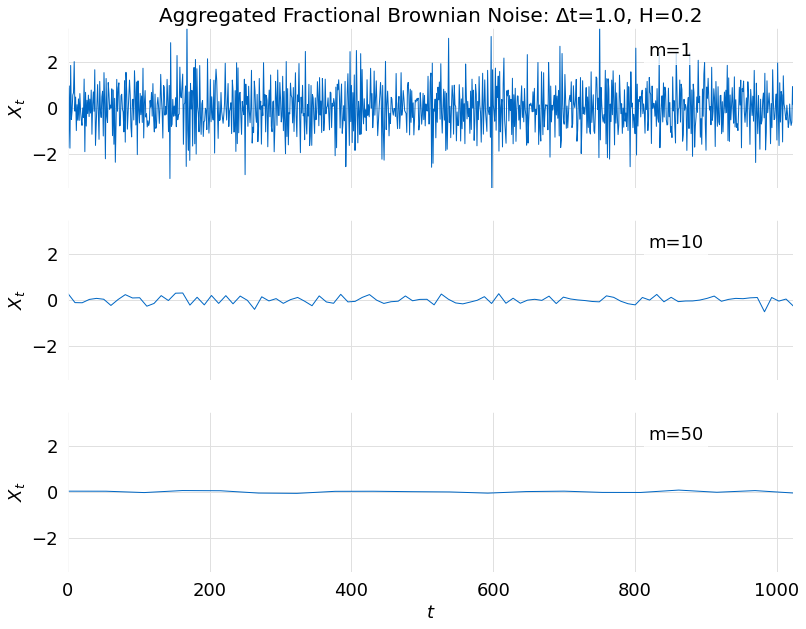

In [19]:
H = 0.2

title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
labels = [f"m={m[0]}", f"m={m[1]}", f"m={m[2]}"]

samples = fbm.fft_noise(H, npts, Δt)
series = fbm.agg_series(samples, m)
time = fbm.agg_time(samples, m)

plots.stack(series, [-3.5, 3.5], x=time, title=title, labels=labels, data_type=PlotDataType.TIME_SERIES)

In [13]:
m_vals = plots.logspace(nagg, npts)
agg_var = fbm.agg_var(samples, m_vals)
results = stats.OLS(agg_var, m_vals, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1792.
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           8.78e-65
Time:                        09:41:09   Log-Likelihood:                 67.747
No. Observations:                 100   AIC:                            -131.5
Df Residuals:                      98   BIC:                            -126.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1999      0.065      3.093      0.003       0.072       0.328
x1            -1.7838      0.042    -42.328      0.000      -1.867      -1.700
==============================================================================
Omnibus:                       11.824   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.580
Skew:                          -0.667   Prob(JB):                      0.00113
Kurtosis:                       4.216   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

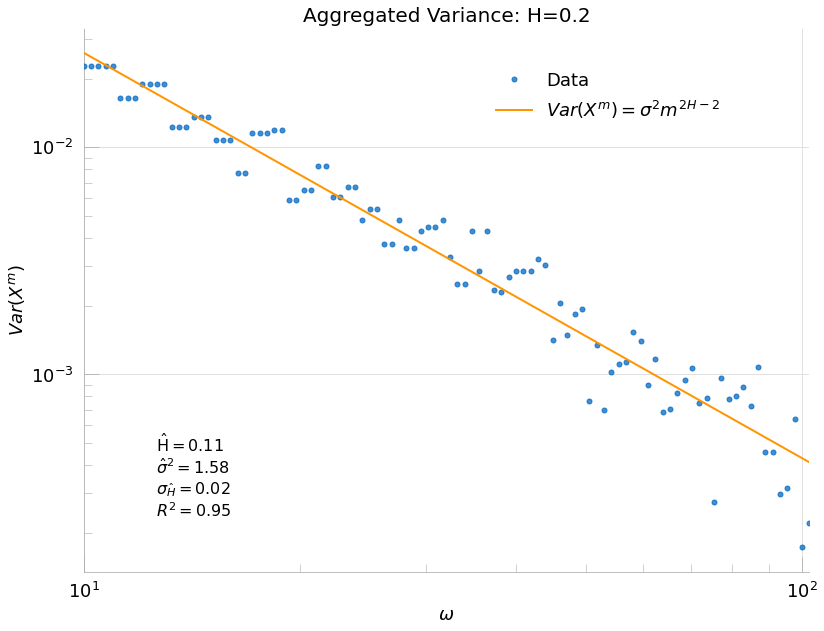

In [14]:
title = title = f"Aggregated Variance: H={H}"
plots.regression(agg_var, m_vals, results, title=title, type=RegressionPlotType.FBM_AGG_VAR)